# Proyecto 04 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

### Libreria pycaret

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### Parte A - Exploración de Datos.
Todo proyecto de Ciencia de Datos empieza con un Análisis Exploratorio de Datos. Y todo Análisis Exploratorio de Datos debe responder preguntas.

El conjunto de datos contiene reseñas en inglés, japonés, alemán, francés, chino y español, recopiladas entre el 1 de noviembre de 2015 y el 1 de noviembre de 2019. Cada registro del conjunto de datos contiene el texto de la reseña, el título de la reseña, la calificación con estrellas y un revisor anónimo. ID, una ID de producto anónima y la categoría de producto de grano grueso (por ejemplo, "libros", "electrodomésticos", etc.)

In [1]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset_dev =pd.read_json('//content/drive/My Drive/Colab Notebooks/dataset_es_dev.json', lines= True)
dataset_test =pd.read_json('//content/drive/My Drive/Colab Notebooks/dataset_es_test.json', lines= True)
dataset_train =pd.read_json('//content/drive/My Drive/Colab Notebooks/dataset_es_train.json', lines= True)

### Cuantos registros y columnas tienen los dataset?

In [4]:
print(dataset_dev.shape)
dataset_dev.head()

(5000, 8)


review_id          product_id  ... language  product_category
0  es_0417480  product_es_0873923  ...       es          wireless
1  es_0180432  product_es_0713146  ...       es           apparel
2  es_0144850  product_es_0356874  ...       es            sports
3  es_0339629  product_es_0939832  ...       es  home_improvement
4  es_0858362  product_es_0489066  ...       es            beauty

[5 rows x 8 columns]

In [5]:
print(dataset_test.shape)
dataset_test.head()

(5000, 8)


review_id          product_id  ... language        product_category
0  es_0038754  product_es_0113523  ...       es                wireless
1  es_0748979  product_es_0017036  ...       es                    home
2  es_0411746  product_es_0138642  ...       es                     toy
3  es_0786686  product_es_0170887  ...       es                    home
4  es_0429700  product_es_0710642  ...       es  digital_ebook_purchase

[5 rows x 8 columns]

In [6]:
print(dataset_train.shape)
dataset_train.head()

(200000, 8)


review_id          product_id  ... language  product_category
0  es_0491108  product_es_0296024  ...       es       electronics
1  es_0869872  product_es_0922286  ...       es       electronics
2  es_0811721  product_es_0474543  ...       es         drugstore
3  es_0359921  product_es_0656090  ...       es          wireless
4  es_0068940  product_es_0662544  ...       es             shoes

[5 rows x 8 columns]

### Informacion estadistica de los dataset

In [7]:
print(dataset_dev.describe())
print(dataset_test.describe())
print(dataset_train.describe())

             stars
count  5000.000000
mean      3.000000
std       1.414355
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
             stars
count  5000.000000
mean      3.000000
std       1.414355
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
               stars
count  200000.000000
mean        3.000000
std         1.414217
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000


### Como estan distribuidos los dataset?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


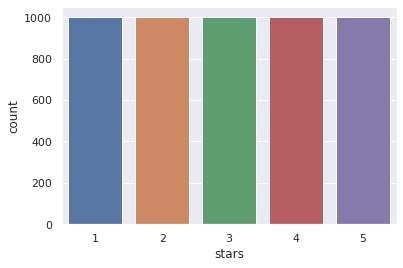

In [8]:
sns.countplot(dataset_dev.stars)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


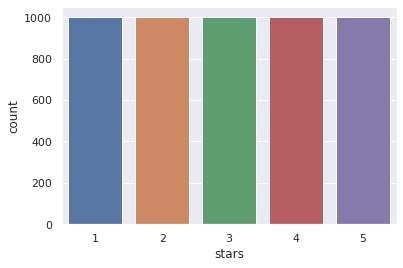

In [9]:
sns.countplot(dataset_test.stars)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


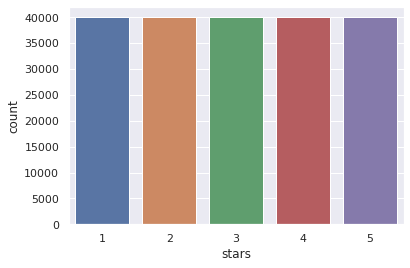

In [10]:
sns.countplot(dataset_train.stars)
plt.show()

### La distribucion de los dataset es uniforme, contienen la misma cantidad de registros para cada estrella.

In [11]:
#dataset_dev['stars'].value_counts(normalize=True)
print(dataset_dev['stars'].value_counts())
print(dataset_test['stars'].value_counts())
print(dataset_train['stars'].value_counts())

3    1000
2    1000
5    1000
1    1000
4    1000
Name: stars, dtype: int64
3    1000
2    1000
5    1000
1    1000
4    1000
Name: stars, dtype: int64
5    40000
4    40000
3    40000
2    40000
1    40000
Name: stars, dtype: int64


In [12]:
print(dataset_dev['language'].value_counts())
print(dataset_test['language'].value_counts())
print(dataset_train['language'].value_counts())

es    5000
Name: language, dtype: int64
es    5000
Name: language, dtype: int64
es    200000
Name: language, dtype: int64


### Se encuentran datos nulos en los dataset?

In [13]:
dataset_dev.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [14]:
dataset_test.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [15]:
dataset_train.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

### Parte B - Modelo de Machine Learning.
En esta sección deberás aplicar las técnicas de Machine Learning aprendidas para crear un modelo predictivo a partir del dataset provisto.

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

Stopwords

In [16]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.remove('no')
stopwords.remove('ni')
#stopwords

In [17]:
dataset_test_mod = pd.concat([dataset_test.review_title,dataset_test.review_body,dataset_test.stars],axis=1)
dataset_train_mod = pd.concat([dataset_train.review_title,dataset_train.review_body,dataset_train.stars],axis=1)
dataset_train_mod.head()

review_title  ... stars
0                                   television Nevir  ...     1
1          Dinero tirado a la basura con esta compra  ...     1
2  solo llega una unidad cuando te obligan a comp...  ...     1
3                              PRODUCTO NO RECIBIDO.  ...     1
4                                           Devuelto  ...     1

[5 rows x 3 columns]

### Stemming

Tomar del dataset solo las columnas de interes

In [18]:
# Importamos esta libreria que nos permite reemplazar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
#from nltk.stem import PorterStemmer
#stemmer = PorterStemmer()

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [19]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
review_list_test=[]
for review in dataset_test_mod.review_title + ", " + dataset_test_mod.review_body:
    # Pasamos todo a minúsculas
    review = review.lower()
    # Reemplazar tildes
    review = review.replace('á', 'a')
    review = review.replace('é', 'e')
    review = review.replace('í', 'i')
    review = review.replace('ó', 'o')
    review = review.replace('ú', 'u')
    review = review.replace('ñ', 'n')
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    review = re.sub("[^a-zA-Z]"," ", str(review))
    # Tokenizamos para separar las palabras del review
    review = nltk.word_tokenize(review)
    # Eliminamos las palabras de menos de 3 letras
    #review = [palabra for palabra in review if len(palabra) > 3]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    review = [stemmer.stem(palabra) for palabra in review]
    # Por ultimo volvemos a unir el titular
    review=" ".join(review)
    
    # Vamos armando una lista con todos los titulares
    review_list_test.append(review)

In [20]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
review_list_train=[]
for review in dataset_train_mod.review_title + ", " + dataset_train_mod.review_body:
    # Pasamos todo a minúsculas
    review = review.lower()
    # Reemplazar tildes
    review = review.replace('á', 'a')
    review = review.replace('é', 'e')
    review = review.replace('í', 'i')
    review = review.replace('ó', 'o')
    review = review.replace('ú', 'u')
    review = review.replace('ñ', 'n')
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    review = re.sub("[^a-zA-Z]"," ", str(review))
    # Tokenizamos para separar las palabras del review
    review = nltk.word_tokenize(review)
    # Eliminamos las palabras de menos de 3 letras
    #review = [palabra for palabra in review if len(palabra) > 3]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    review = [stemmer.stem(palabra) for palabra in review]
    # Por ultimo volvemos a unir el titular
    review=" ".join(review)
    
    # Vamos armando una lista con todos los titulares
    review_list_train.append(review)

Agregamos al dataset una columna llamado review_stem que contenga los reviews stemmizados

In [21]:
dataset_test_mod["review_stem"] = review_list_test
dataset_train_mod["review_stem"] = review_list_train
dataset_train_mod.tail()

review_title  ...                                        review_stem
199995  Tal y como se describe  ...  tal describ mand funcion perfect cumpl tod fun...
199996  Funciona perfectamente  ...  funcion perfect compr bateri ciert reticent re...
199997          Buena calidad.  ...              buen calid buen calid satisfech compr
199998             Recomendado  ...                         recomend perfect cumpl hij
199999               Preciosas  ...  preci sup bien broch buen no men caid pelit qu...

[5 rows x 4 columns]

### Lemmatization

In [22]:
#nltk.download()
# responder d all
nltk.download('wordnet')
nltk.download('maxent_treebank_pos_tagger')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [23]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [24]:
review_list_test=[]
for review in dataset_test_mod.review_title + ", " + dataset_test_mod.review_body:
    # Pasamos todo a minúsculas
    review = review.lower()

    # Reemplazar tildes
    review = review.replace('á', 'a')
    review = review.replace('é', 'e')
    review = review.replace('í', 'i')
    review = review.replace('ó', 'o')
    review = review.replace('ú', 'u')
    review = review.replace('ñ', 'n')

    # Vamos a reemplazar los caracteres que no sean letras por espacios
    review = re.sub("[^a-zA-Z]"," ", str(review))
    # Tokenizamos para separar las palabras
    review = nltk.word_tokenize(review)
    
    # Aplicamos el Lemmatizer
    #review_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in review]
    
    # Eliminamos las palabras de al menos 3 letras
    #review = [palabra for palabra in review if len(palabra) > 3]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    review = " ".join(review)
    #dataset["titular_normalizado"] = titular_list
    review_list_test.append(review)

In [25]:
review_list_train=[]
for review in dataset_train_mod.review_title + ", " + dataset_train_mod.review_body:
    # Pasamos todo a minúsculas
    review = review.lower()

    # Reemplazar tildes
    review = review.replace('á', 'a')
    review = review.replace('é', 'e')
    review = review.replace('í', 'i')
    review = review.replace('ó', 'o')
    review = review.replace('ú', 'u')
    review = review.replace('ñ', 'n')

    # Vamos a reemplazar los caracteres que no sean letras por espacios
    review = re.sub("[^a-zA-Z]"," ", str(review))
    # Tokenizamos para separar las palabras
    review = nltk.word_tokenize(review)
    
    # Aplicamos el Lemmatizer
    #review_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in review]
    
    # Eliminamos las palabras de al menos 3 letras
    #review = [palabra for palabra in review if len(palabra) > 3]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    review = " ".join(review)
    #dataset["titular_normalizado"] = titular_list
    review_list_train.append(review)

In [26]:
dataset_test_mod["review_lemm"] = review_list_test
dataset_train_mod["review_lemm"] = review_list_train
dataset_train_mod.tail()

review_title  ...                                        review_lemm
199995  Tal y como se describe  ...  tal describe mando funciona perfectamente cump...
199996  Funciona perfectamente  ...  funciona perfectamente compre bateria cierta r...
199997          Buena calidad.  ...      buena calidad buena calidad satisfecha compra
199998             Recomendado  ...                   recomendado perfecto cumple hijo
199999               Preciosas  ...  preciosas super bien brochas buenas no menos c...

[5 rows x 5 columns]

### Vectorizar

In [27]:
# Tomamos la lista de palabras y el vector que nos dice la cantidad de estrellas de un review
list_reviews_test = list(dataset_test_mod['review_lemm'].values)
stars_test = dataset_test_mod['stars'].values

list_reviews_train = list(dataset_train_mod['review_lemm'].values)
stars_train = dataset_train_mod['stars'].values

Preparamos el conversor de bag of words a vectores que traemos de sklearn

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features = 1000

# Es decir que cada instancia tendrá 1000 features
cou_vec = CountVectorizer(max_features=max_features, ngram_range=(1, 4)) # stop_words="english" , ngram_range=(1, 2)

In [29]:
matriz_reviews_test = cou_vec.fit_transform(list_reviews_test)
matriz_reviews_train = cou_vec.fit_transform(list_reviews_train)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ", all_words[0:50])

50 palabras mas usadas:  ['abajo', 'abierto', 'abrir', 'acaba', 'acabado', 'acabados', 'acabo', 'accesorios', 'aceite', 'aceptable', 'aconsejo', 'adapta', 'adaptador', 'adecuado', 'ademas', 'agradable', 'agua', 'aguanta', 'agujeros', 'ahi', 'ahora', 'aire', 'ajusta', 'ajusta bien', 'ajuste', 'alguien', 'algun', 'alguna', 'alta', 'altavoz', 'alto', 'altura', 'amazon', 'ano', 'anos', 'anterior', 'anuncio', 'aparato', 'aparece', 'aparte', 'apenas', 'aplicacion', 'app', 'aqui', 'arriba', 'articulo', 'asi', 'asi no', 'aspecto', 'atencion']


### Modelar

In [30]:
x_test = matriz_reviews_test.toarray()
y_test = stars_test

x_train = matriz_reviews_train.toarray()
y_train = stars_train

from sklearn.model_selection import train_test_split
xtrain_test, xtest_test, ytrain_test, ytest_test = train_test_split(x_test, y_test, test_size = 0.2, random_state = 42, stratify = y_test)
xtrain_train, xtest_train, ytrain_train, ytest_train = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

In [73]:
xy_test = pd.DataFrame(x_test)

In [74]:
xy_test.head()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0   

   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0   
1    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    2    0    0    1    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   90   91   92   93   94   95   96   97   98   99   100  101  102  103  104  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    

In [75]:
xy_test['stars'] = y_test
xy_test.head()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  \
0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
2  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
3  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
4  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   

   21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   1   0   0   0   0   0   0   0   0   0   2   0   0   1   0   0   0   0   
4   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   

   40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  \
0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
1   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
2   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
3   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
4   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   

   112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    

### Pycaret

In [36]:
#!pip install pycaret

In [37]:
from pycaret.utils import version
version()

'2.3.3'

In [38]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [39]:
# Importando el modulo e inicializando el setup
from pycaret.classification import *

In [76]:
clf = setup(data = xy_test, target = 'stars')

Description                         Value
0                               session_id                           560
1                                   Target                         stars
2                              Target Type                    Multiclass
3                            Label Encoded  1: 0, 2: 1, 3: 2, 4: 3, 5: 4
4                            Original Data                  (5000, 1001)
5                           Missing Values                         False
6                         Numeric Features                             0
7                     Categorical Features                          1000
8                         Ordinal Features                         False
9                High Cardinality Features                         False
10                 High Cardinality Method                          None
11                   Transformed Train Set                  (3499, 2562)
12                    Transformed Test Set                  (1501, 2562)
13                      Shuffle Train-Test                          True
14                     Stratify Train-Test                         False
15                          Fold Generator               StratifiedKFold
16                             Fold Number                            10
17                                CPU Jobs                            -1
18                                 Use GPU                         False
19                          Log Experiment                         False
20                         Experiment Name              clf-default-name
21                                     USI                          88c6
22                         Imputation Type                        simple
23          Iterative Imputation Iteration                          None
24                         Numeric Imputer                          mean
25      Iterative Imputation Numeric Model                          None
26                     Categorical Imputer                      constant
27  Iterative Imputation Categorical Model                          None
28           Unknown Categoricals Handling                least_frequent
29                               Normalize                         False
30                        Normalize Method                          None
31                          Transformation                         False
32                   Transformation Method                          None
33                                     PCA                         False
34                              PCA Method                          None
35                          PCA Components                          None
36                     Ignore Low Variance                         False
37                     Combine Rare Levels                         False
38                    Rare Level Threshold                          None
39                         Numeric Binning                         False
40                         Remove Outliers                         False
41                      Outliers Threshold                          None
42                Remove Multicollinearity                         False
43             Multicollinearity Threshold                          None
44             Remove Perfect Collinearity                          True
45                              Clustering                         False
46                    Clustering Iteration                          None
47                     Polynomial Features                         False
48                       Polynomial Degree                          None
49                    Trignometry Features                         False
50                    Polynomial Threshold                          None
51                          Group Features                         False
52                       Feature Selection                         False
53                Feature Selection Method                       classic
54            Fe

In [77]:
# Obtener el mejor modelo
mejor_modelo = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.4436  0.7650  0.4454  0.4318   
lightgbm  Light Gradient Boosting Machine    0.4413  0.7703  0.4426  0.4388   
et                 Extra Trees Classifier    0.4330  0.7530  0.4345  0.4221   
lr                    Logistic Regression    0.4273  0.7561  0.4287  0.4265   
gbc          Gradient Boosting Classifier    0.4175  0.7583  0.4184  0.4151   
ridge                    Ridge Classifier    0.3910  0.0000  0.3922  0.3890   
svm                   SVM - Linear Kernel    0.3847  0.0000  0.3872  0.4566   
ada                  Ada Boost Classifier    0.3835  0.7038  0.3840  0.4059   
lda          Linear Discriminant Analysis    0.3715  0.6762  0.3726  0.3733   
dt               Decision Tree Classifier    0.3704  0.6091  0.3712  0.3690   
nb                            Naive Bayes    0.3501  0.6171  0.3540  0.3357   
knn                K Neighbors Classifier    0.3421  0.6537  0.3417  0.3545   
qda       Quadratic Discriminant Analysis    0.2341  0.5221  0.2356  0.1944   

              F1   Kappa     MCC  TT (Sec)  
rf        0.4309  0.3047  0.3071     3.780  
lightgbm  0.4388  0.3016  0.3020     1.762  
et        0.4228  0.2914  0.2931     5.067  
lr        0.4255  0.2840  0.2845    35.252  
gbc       0.4118  0.2717  0.2732    45.185  
ridge     0.3887  0.2387  0.2391     0.624  
svm       0.3415  0.2317  0.2594     4.408  
ada       0.3882  0.2288  0.2310     2.323  
lda       0.3707  0.2144  0.2148    15.975  
dt        0.3679  0.2129  0.2134     1.015  
nb        0.3110  0.1895  0.2015     0.205  
knn       0.3270  0.1765  0.1831     8.494  
qda       0.2112  0.0440  0.0456     2.893

### Modelo Random Forest Classifier

In [78]:
# train Random Forest Classifier
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4629  0.7899  0.4644  0.4473  0.4477  0.3290  0.3318
1       0.4714  0.7790  0.4727  0.4665  0.4589  0.3393  0.3428
2       0.4686  0.7581  0.4694  0.4575  0.4577  0.3358  0.3377
3       0.4029  0.7380  0.4041  0.3918  0.3910  0.2539  0.2558
4       0.4314  0.7708  0.4340  0.4158  0.4167  0.2897  0.2921
5       0.4200  0.7495  0.4225  0.3990  0.4027  0.2754  0.2778
6       0.4486  0.7727  0.4512  0.4362  0.4367  0.3112  0.3132
7       0.4686  0.7841  0.4701  0.4592  0.4583  0.3359  0.3379
8       0.4229  0.7577  0.4250  0.4147  0.4137  0.2787  0.2804
9       0.4384  0.7498  0.4407  0.4297  0.4253  0.2982  0.3009
Mean    0.4436  0.7650  0.4454  0.4318  0.4309  0.3047  0.3071
SD      0.0229  0.0160  0.0226  0.0247  0.0234  0.0286  0.0288

In [79]:
#Funcion para ejecutar el modelo con los hiperparametros por defecto
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4571  0.7712  0.4592  0.4542  0.4379  0.3220  0.3291
1       0.3943  0.7569  0.3954  0.3941  0.3824  0.2426  0.2463
2       0.4000  0.7368  0.4016  0.3907  0.3848  0.2506  0.2542
3       0.4057  0.7466  0.4070  0.3926  0.3904  0.2574  0.2603
4       0.4486  0.7664  0.4510  0.4373  0.4355  0.3111  0.3135
5       0.4000  0.7582  0.4027  0.3916  0.3901  0.2501  0.2519
6       0.4343  0.7692  0.4377  0.4102  0.4060  0.2939  0.2999
7       0.4457  0.7753  0.4462  0.4382  0.4315  0.3069  0.3103
8       0.4257  0.7485  0.4284  0.4181  0.4082  0.2831  0.2879
9       0.3725  0.7330  0.3740  0.3561  0.3558  0.2155  0.2178
Mean    0.4184  0.7562  0.4203  0.4083  0.4023  0.2733  0.2771
SD      0.0264  0.0139  0.0266  0.0277  0.0253  0.0332  0.0342

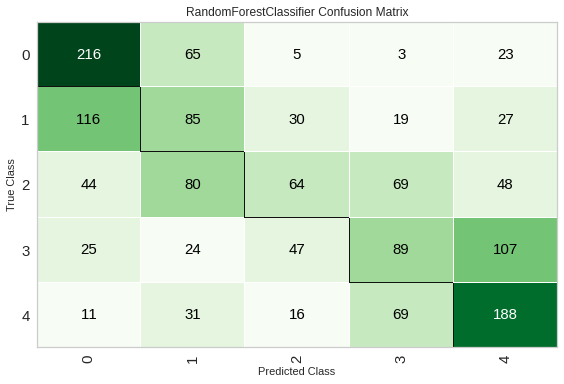

In [80]:
#Graficar
plot_model(tuned_rf, plot = 'confusion_matrix')

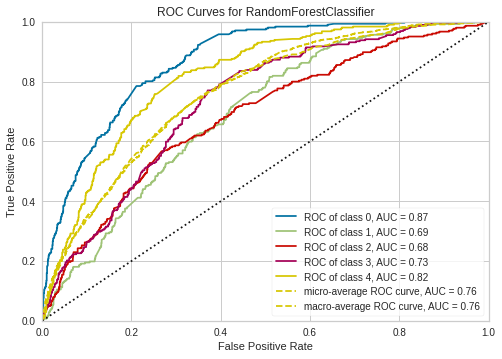

In [82]:
#Graficar
plot_model(tuned_rf, plot = 'auc')

### Modelo Light Gradient Boosting Machine

In [84]:
# train Light Gradient Boosting Machine
lightgbm = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4114  0.7634  0.4133  0.4018  0.4040  0.2645  0.2654
1       0.4543  0.7874  0.4555  0.4498  0.4496  0.3179  0.3188
2       0.4086  0.7500  0.4092  0.4071  0.4073  0.2605  0.2607
3       0.4514  0.7592  0.4521  0.4554  0.4531  0.3143  0.3143
4       0.4600  0.7881  0.4617  0.4580  0.4586  0.3250  0.3251
5       0.4600  0.7734  0.4615  0.4578  0.4563  0.3252  0.3261
6       0.4114  0.7615  0.4130  0.4112  0.4106  0.2642  0.2645
7       0.4457  0.7915  0.4468  0.4419  0.4427  0.3069  0.3073
8       0.4686  0.7689  0.4707  0.4662  0.4659  0.3357  0.3362
9       0.4413  0.7597  0.4427  0.4393  0.4397  0.3015  0.3017
Mean    0.4413  0.7703  0.4426  0.4388  0.4388  0.3016  0.3020
SD      0.0214  0.0136  0.0215  0.0224  0.0218  0.0268  0.0268

In [85]:
#Funcion para ejecutar el modelo con los hiperparametros por defecto
tuned_lightgbm = tune_model(lightgbm)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4543  0.7899  0.4551  0.4435  0.4463  0.3179  0.3189
1       0.4857  0.7777  0.4864  0.4757  0.4785  0.3571  0.3580
2       0.4257  0.7656  0.4267  0.4236  0.4240  0.2821  0.2823
3       0.4314  0.7446  0.4320  0.4276  0.4276  0.2893  0.2899
4       0.4829  0.8039  0.4844  0.4859  0.4801  0.3535  0.3552
5       0.4771  0.7841  0.4790  0.4746  0.4743  0.3468  0.3473
6       0.4257  0.7766  0.4277  0.4203  0.4179  0.2823  0.2841
7       0.4314  0.7953  0.4330  0.4235  0.4246  0.2893  0.2903
8       0.4600  0.7717  0.4618  0.4544  0.4562  0.3250  0.3254
9       0.4527  0.7722  0.4542  0.4479  0.4479  0.3160  0.3168
Mean    0.4527  0.7782  0.4540  0.4477  0.4477  0.3159  0.3168
SD      0.0224  0.0158  0.0224  0.0231  0.0227  0.0280  0.0280

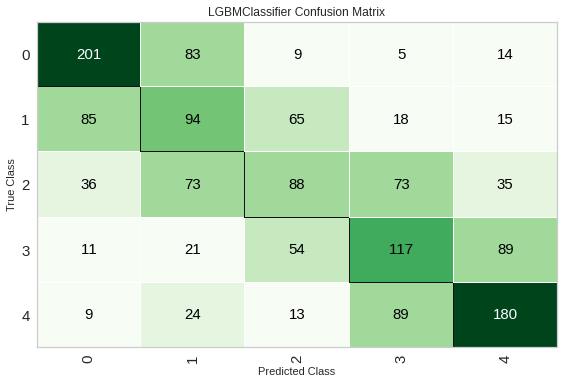

In [86]:
#Graficar
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

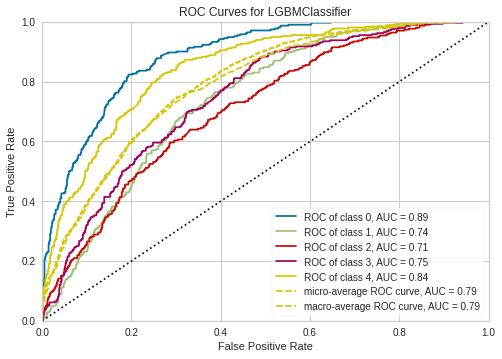

In [88]:
#Graficar
plot_model(tuned_lightgbm, plot = 'auc')

# Agrupar el target en 3 clases

In [104]:
xy_test_3clases = pd.DataFrame(x_test)

In [105]:
xy_test_3clases['stars'] = y_test
xy_test_3clases.head()

0  1  2  3  4  5  6  7  8  ...  992  993  994  995  996  997  998  999  stars
0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      1
1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      1
2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      1
3  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      1
4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      1

[5 rows x 1001 columns]

In [106]:
xy_test_3clases.stars.value_counts()

3    1000
2    1000
5    1000
1    1000
4    1000
Name: stars, dtype: int64

In [107]:
# Reemplazar las estrellas 2 por 1, las estrellas 3 por 2 y las estrellas 4 y 5 por 3 y asi tengo 3 clases para tratar de obtener un mejor resultado en los modelos.
xy_test_3clases.replace(2, 1, inplace=True)
xy_test_3clases.replace(3, 2, inplace=True)
xy_test_3clases.replace(4, 3, inplace=True)
xy_test_3clases.replace(5, 3, inplace=True)

In [108]:
xy_test_3clases.stars.value_counts()

3    2000
1    2000
2    1000
Name: stars, dtype: int64

In [109]:
clf_3clases = setup(data = xy_test_3clases, target = 'stars')

Description             Value
0                               session_id              6849
1                                   Target             stars
2                              Target Type        Multiclass
3                            Label Encoded  1: 0, 2: 1, 3: 2
4                            Original Data      (5000, 1001)
5                           Missing Values             False
6                         Numeric Features                 0
7                     Categorical Features              1000
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set      (3499, 1371)
12                    Transformed Test Set      (1501, 1371)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              b3be
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [110]:
# Obtener el mejor modelo
mejor_modelo_3clases = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.6793  0.8369  0.6080  0.6581   
lr                    Logistic Regression    0.6716  0.8258  0.6080  0.6565   
rf               Random Forest Classifier    0.6716  0.8192  0.5803  0.6298   
gbc          Gradient Boosting Classifier    0.6659  0.8274  0.5738  0.6253   
ridge                    Ridge Classifier    0.6651  0.0000  0.5928  0.6415   
et                 Extra Trees Classifier    0.6648  0.8093  0.5810  0.6280   
ada                  Ada Boost Classifier    0.6582  0.7849  0.5651  0.6157   
lda          Linear Discriminant Analysis    0.6379  0.7874  0.5831  0.6336   
svm                   SVM - Linear Kernel    0.6359  0.0000  0.5590  0.6351   
knn                K Neighbors Classifier    0.5893  0.7316  0.5050  0.5498   
dt               Decision Tree Classifier    0.5687  0.6756  0.5123  0.5625   
qda       Quadratic Discriminant Analysis    0.4607  0.5928  0.4272  0.4126   
nb                            Naive Bayes    0.4093  0.7339  0.4696  0.6601   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.6639  0.4875  0.4912     0.913  
lr        0.6621  0.4796  0.4812    16.196  
rf        0.6344  0.4643  0.4761     2.609  
gbc       0.6264  0.4536  0.4666    15.074  
ridge     0.6482  0.4639  0.4679     0.233  
et        0.6375  0.4585  0.4657     3.603  
ada       0.6172  0.4406  0.4545     1.325  
lda       0.6350  0.4317  0.4323     3.403  
svm       0.5992  0.4152  0.4409     1.534  
knn       0.5501  0.3294  0.3446     4.597  
dt        0.5647  0.3224  0.3230     0.804  
qda       0.4066  0.1818  0.1943     3.071  
nb        0.4287  0.1940  0.2503     0.115

### Modelo Random Forest Classifier 3 Clases

In [116]:
# train Random Forest Classifier
rf_3clases = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6886  0.8328  0.5964  0.6530  0.6530  0.4911  0.5029
1       0.6514  0.7930  0.5533  0.5947  0.6066  0.4278  0.4413
2       0.7057  0.8368  0.6143  0.6772  0.6692  0.5196  0.5339
3       0.6571  0.8173  0.5786  0.6416  0.6276  0.4413  0.4531
4       0.6943  0.8430  0.6024  0.6576  0.6573  0.5014  0.5141
5       0.6600  0.7967  0.5786  0.6285  0.6314  0.4486  0.4569
6       0.6800  0.8130  0.5760  0.6077  0.6306  0.4760  0.4905
7       0.6486  0.8124  0.5573  0.5981  0.6105  0.4274  0.4376
8       0.6943  0.8512  0.5998  0.6524  0.6546  0.5008  0.5142
9       0.6361  0.7955  0.5459  0.5871  0.6030  0.4091  0.4168
Mean    0.6716  0.8192  0.5803  0.6298  0.6344  0.4643  0.4761
SD      0.0226  0.0198  0.0218  0.0296  0.0221  0.0362  0.0378

In [117]:
#Funcion para ejecutar el modelo con los hiperparametros por defecto
tuned_rf_3clases = tune_model(rf_3clases)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6543  0.7921  0.5433  0.5271  0.5834  0.4223  0.4481
1       0.6571  0.8080  0.5457  0.5278  0.5853  0.4272  0.4526
2       0.6743  0.8337  0.5619  0.5394  0.5994  0.4571  0.4849
3       0.6314  0.8019  0.5262  0.5068  0.5621  0.3863  0.4093
4       0.6800  0.8316  0.5667  0.5440  0.6044  0.4667  0.4950
5       0.6229  0.7973  0.5190  0.4986  0.5537  0.3714  0.3942
6       0.6543  0.8157  0.5449  0.5256  0.5809  0.4235  0.4525
7       0.6429  0.8099  0.5356  0.5146  0.5714  0.4046  0.4295
8       0.6914  0.8486  0.5760  0.5548  0.6154  0.4861  0.5150
9       0.6103  0.7845  0.5069  0.4915  0.5439  0.3497  0.3707
Mean    0.6519  0.8123  0.5426  0.5230  0.5800  0.4195  0.4452
SD      0.0244  0.0192  0.0206  0.0192  0.0216  0.0408  0.0433

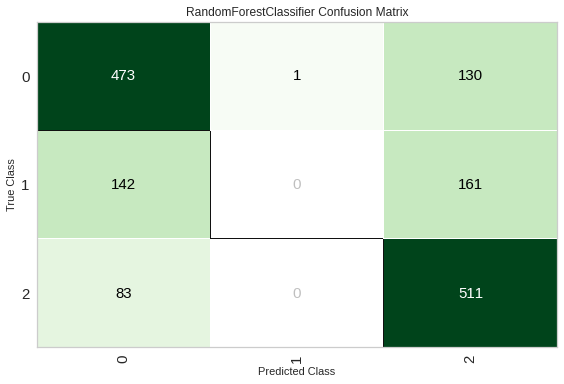

In [118]:
#Graficar
plot_model(tuned_rf_3clases, plot = 'confusion_matrix')

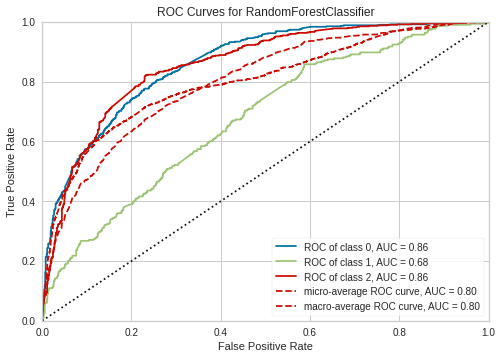

In [119]:
#Graficar
plot_model(tuned_rf_3clases, plot = 'auc')

### Modelo Light Gradient Boosting Machine 3 Clases

In [111]:
# train Light Gradient Boosting Machine
lightgbm_3clases = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6943  0.8457  0.6183  0.6731  0.6813  0.5130  0.5152
1       0.6800  0.8219  0.6015  0.6515  0.6596  0.4850  0.4897
2       0.7143  0.8604  0.6429  0.6928  0.7004  0.5450  0.5476
3       0.6457  0.8329  0.5738  0.6213  0.6305  0.4348  0.4373
4       0.6857  0.8522  0.6167  0.6649  0.6693  0.4963  0.5006
5       0.6714  0.8237  0.6119  0.6588  0.6626  0.4796  0.4817
6       0.6629  0.8220  0.5832  0.6344  0.6450  0.4615  0.4649
7       0.6686  0.8303  0.5975  0.6461  0.6531  0.4707  0.4741
8       0.7229  0.8676  0.6497  0.7087  0.7019  0.5524  0.5617
9       0.6476  0.8129  0.5846  0.6298  0.6351  0.4367  0.4391
Mean    0.6793  0.8369  0.6080  0.6581  0.6639  0.4875  0.4912
SD      0.0244  0.0175  0.0237  0.0263  0.0235  0.0383  0.0394

In [112]:
#Funcion para ejecutar el modelo con los hiperparametros por defecto
tuned_lightgbm_3clases = tune_model(lightgbm_3clases)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6971  0.8621  0.6231  0.6768  0.6827  0.5157  0.5195
1       0.7000  0.8282  0.6206  0.6725  0.6797  0.5172  0.5223
2       0.7029  0.8547  0.6286  0.6777  0.6863  0.5255  0.5288
3       0.6857  0.8535  0.6286  0.6738  0.6769  0.5014  0.5037
4       0.7171  0.8791  0.6381  0.6891  0.6958  0.5455  0.5511
5       0.6857  0.8372  0.6262  0.6710  0.6746  0.4991  0.5017
6       0.6743  0.8320  0.5879  0.6346  0.6472  0.4750  0.4815
7       0.6771  0.8394  0.5975  0.6463  0.6556  0.4815  0.4867
8       0.7114  0.8713  0.6403  0.6944  0.6925  0.5353  0.5424
9       0.6734  0.8315  0.5985  0.6476  0.6544  0.4753  0.4801
Mean    0.6925  0.8489  0.6189  0.6684  0.6746  0.5071  0.5118
SD      0.0148  0.0170  0.0171  0.0184  0.0159  0.0236  0.0238

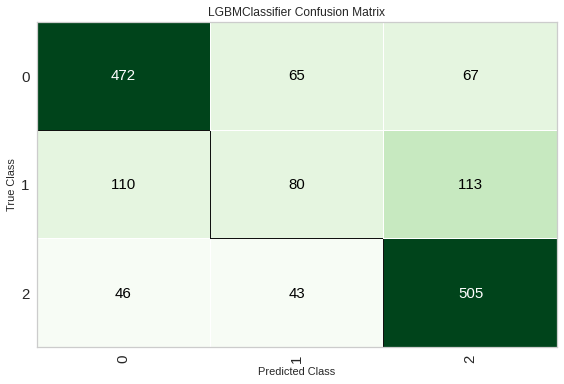

In [113]:
#Graficar 3 clases
plot_model(tuned_lightgbm_3clases, plot = 'confusion_matrix')

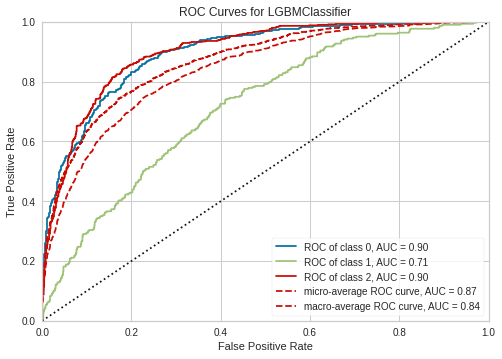

In [114]:
#Graficar 3 clases
plot_model(tuned_lightgbm_3clases, plot = 'auc')

# Comentarios
### - Que libreria se uso?
### R:/ Se uso la libreria PyCaret la cual es muy util ya que evalua varios modelos y los organiza segun los resultados obtenidos.

### - En el primero modelo con 5 clases el area bajo la curva nos indica que los reviews con estrellas 1 y 5 son las que el modelo predice mejor.

### - Como mejorar el modelo?
### R:/ Se agruparon las Reviews para obtener una mejor clasificacion asi: Reviews con 1 y 2 estrellas llamarlo 1, Reviews con 3 estrellas llamarlo 2 y Reviews con 4 y 5 estrellas llamarlo 3, se ejecuta los modelos y se obtiene que el area bajo la curva mejoro el grupo 1 (que contiene las estrellas 1 y 2) y mejoro el grupo 3 (que contiene las estrellas 4 y 5) las estrellas 3 siguen teniendo el mismo resutado no mejoro ni empeoro.

### - Que modelo nos da mejores resultados?
### R:/ El modelo Light Gradient Boosting Machine nos entrega un area bajo la curva mas cercana a 1 con el dataset agrupando los Reviews por estrellas.

In [41]:
# Obtener el top 3 de los mejores modelos basados en Accuracy
#top3 = compare_models(n_select = 3)

# Obtener el mejor modelo basado en AUC
#best = compare_models(sort = 'AUC') #default is 'Accuracy'

# Comparando modelos especificos
#mejor_modelo_especifico = compare_models(include = ['dt','rf','xgboost'])

# Incluir en la lista negra ciertos modelos
#best_specific = compare_models(exclude = ['catboost', 'svm'])

In [42]:
# train linear regression model
#lr = create_model('lr') #lr is the id of the model

# check the model library to see all models
#models()

# train rf model using 5 fold CV
#rf = create_model('rf', fold = 5)

# train svm model without CV
#svm = create_model('svm', cross_validation = False)

# train xgboost model with max_depth = 10
#xgboost = create_model('xgboost', max_depth = 10)

# train xgboost model on gpu
#xgboost_gpu = create_model('xgboost', tree_method = 'gpu_hist', gpu_id = 0) #0 is gpu-id

# train multiple lightgbm models with n learning_rate
#import numpy as np
#lgbms = [create_model('lightgbm', learning_rate = i) for i in np.arange(0.1,1,0.1)]

# train custom model
#from gplearn.genetic import SymbolicRegressor
#symreg = SymbolicRegressor(generation = 50)
#sc = create_model(symreg)